In [1]:
pip install tensorflow keras matplotlib numpy pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Importing Required Packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,Input
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# Loading and Pre-processing the Image Data from file system
# Assuming last column in CSV is the label, others are pixel values
train_df = pd.read_csv('CIFR_train_data.csv')
test_df = pd.read_csv('CIFR_test_data.csv')

# Extract pixel data and labels


# Last column is the label, all previous columns are pixel values
x_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

x_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values


# Reshape pixel data to 32x32x3 for grayscale images

x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

# Convert to float32 and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Shape of Training :", x_train.shape)
print("Shape of Testing  :", x_test.shape)

input_shape = (32,32,3)

Shape of Training : (50000, 32, 32, 3)
Shape of Testing  : (10000, 32, 32, 3)


In [8]:
# Defining the Model's Architecture using Input layer for best practice
model = Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(28, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 28)          │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6300)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │       1,260,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,262,994 (4.82 MB)

 Trainable params: 1,262,994 (4.82 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Training the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2)


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.4518 - loss: 1.5270
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.5478 - loss: 1.2644


In [10]:
# Estimating the Model's Performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5907 - loss: 1.1530 
Loss=1.153
Accuracy=0.591


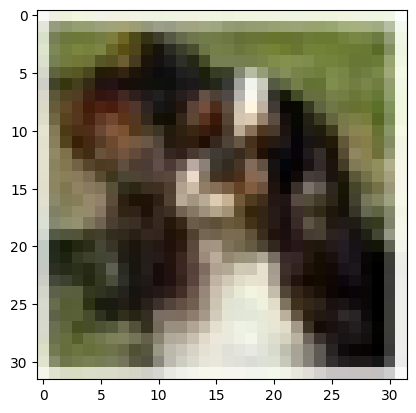

In [13]:
# Showing image at position 0 from dataset
image = x_train[500]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [14]:
# Predicting the class of image
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict(image)
print("Predicted class: {}".format(np.argmax(predict_model)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted class: 7
